<h1> K-Nearest Neighbors</h1>

<p>An example of the nearest neighbor algorithm application using the well known iris dataset</p>
<p>First we import the dataset</p>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

<p>Then the algorithm itself</p>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

<p>In the following we will focus on the first and third columns/features of the dataset</p>

In [36]:
X = iris.data[:,0:3:2]
y = iris['target']

<p>Now applying the algorithm to the data</p>

In [37]:
#knn.fit(X,y)
%timeit knn.fit(X,y)

1000 loops, best of 3: 468 µs per loop


<p>Next we can try to map the predictions by asking the prediction for several points in our features space :</p>

In [28]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,301),np.linspace(0.0,10.0,301))
predict = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = predict.reshape(np.shape(xx))

<p>Now visualizing the result</p>

(0.0, 8.0)

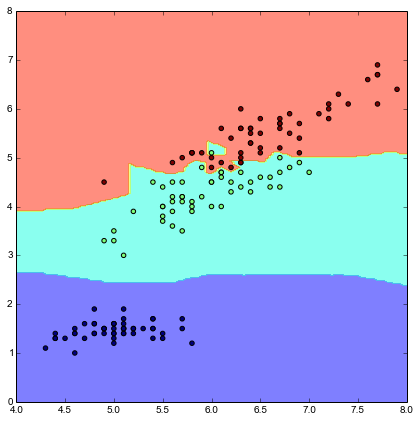

In [48]:
plt.figure(figsize=(7,7))
plt.contourf(xx,yy,Z,3,alpha=0.5)
plt.scatter(X.T[0],X.T[1],c=iris['target'])
plt.xlim(4.0,8.0)
plt.ylim(0.0,8.0)

<p>Using the informations at this addresse :<br>
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
<br>
try different values for the different parameters</p>

KD_Tree

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
%timeit knn.fit(X,y)

1000 loops, best of 3: 748 µs per loop


BALLTREE

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
%timeit knn.fit(X,y)

The slowest run took 4.81 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 738 µs per loop


BRUTE

The slowest run took 5.31 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 490 µs per loop


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.
  from ipykernel import kernelapp as app


(0.0, 8.0)

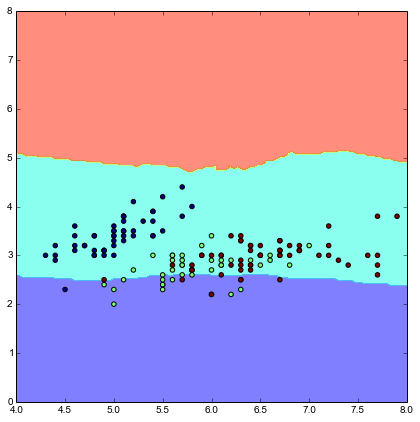

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute',weight='distance')
%timeit knn.fit(X,y)
X = iris.data[:,0:3:1]
y = iris['target']

xx,yy = np.meshgrid(np.linspace(0.0,10.0,301),np.linspace(0.0,10.0,301))
predict = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = predict.reshape(np.shape(xx))

plt.figure(figsize=(7,7))
plt.contourf(xx,yy,Z,3,alpha=0.5)
plt.scatter(X.T[0],X.T[1],c=iris['target'])
plt.xlim(4.0,8.0)
plt.ylim(0.0,8.0)